# Time-evolving Block Decimation on Finite Spin Chains

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import quimb.tensor as qtn

from tebd.hamiltonian import LocalIsingHamiltonian
from tebd.hamiltonian import IsingHamiltonian
from tebd.matrix_product_states import MatrixProductState
from tebd.tebd import run_tebd
from tebd.tebd import TEBD

In [2]:
d = 2
N = 6
bond_dim = 2

In [3]:
lmda = 0
loc_ham_ising = LocalIsingHamiltonian(N, lmda)
glob_ham_ising = IsingHamiltonian(N, lmda)

In [4]:
loc_ham_ising.hamiltonians[0]

[[0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]]

In [5]:
MPS = MatrixProductState(d=2, N=N, bond_dim=bond_dim)

In [6]:
MPS.data

[Tensor(shape=(2, 2), inds=('k0', 'i0'), tags=oset(['state 1'])),
 Tensor(shape=(2, 2, 2), inds=('i0', 'k1', 'i1'), tags=oset(['state 2'])),
 Tensor(shape=(2, 2, 2), inds=('i1', 'k2', 'i2'), tags=oset(['state 3'])),
 Tensor(shape=(2, 2, 2), inds=('i2', 'k3', 'i3'), tags=oset(['state 4'])),
 Tensor(shape=(2, 2, 2), inds=('i3', 'k4', 'i4'), tags=oset(['state 5'])),
 Tensor(shape=(2, 2), inds=('i4', 'k5'), tags=oset(['state 6']))]

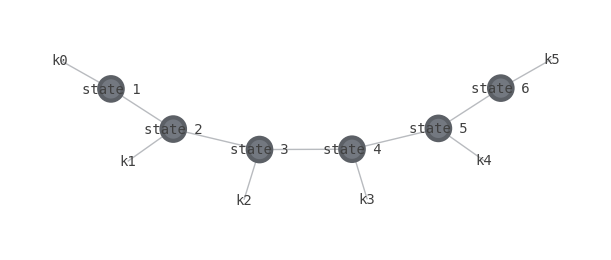

In [7]:
qtn.TensorNetwork(MPS.data).draw()

Make sure the state is normalized.

In [8]:
MPS.norm()

0.9999999999999998

Look at the density matrix.

In [9]:
rho = MPS.rho()

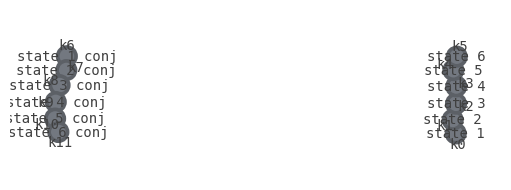

In [10]:
rho.draw(figsize=(5, 5))

Create TEBD object.

In [11]:
tebd_obj = TEBD(MPS, loc_ham_ising, glob_ham_ising, evol_type="imag")

Evolve state.

In [12]:
tau = 0.1
num_iter = 5000
mid_steps = 100

The energy goes to $-N + 1 = -5$.

In [13]:
energies, wave_functions = run_tebd(tebd_obj, tau, num_iter, mid_steps)

Iteration: 0 of 5000, energy: 3.5186787783016893
Iteration: 100 of 5000, energy: -4.999999999999997
Iteration: 200 of 5000, energy: -5.0
Iteration: 300 of 5000, energy: -5.000000000000002
Iteration: 400 of 5000, energy: -4.999999999999999
Iteration: 500 of 5000, energy: -4.999999999999998
Iteration: 600 of 5000, energy: -5.0
Iteration: 700 of 5000, energy: -5.0
Iteration: 800 of 5000, energy: -4.999999999999998
Iteration: 900 of 5000, energy: -5.0
Iteration: 1000 of 5000, energy: -4.999999999999999
Iteration: 1100 of 5000, energy: -4.999999999999998
Iteration: 1200 of 5000, energy: -5.0
Iteration: 1300 of 5000, energy: -4.999999999999999
Iteration: 1400 of 5000, energy: -4.999999999999999
Iteration: 1500 of 5000, energy: -5.0
Iteration: 1600 of 5000, energy: -4.999999999999999
Iteration: 1700 of 5000, energy: -5.0
Iteration: 1800 of 5000, energy: -4.999999999999999
Iteration: 1900 of 5000, energy: -5.0
Iteration: 2000 of 5000, energy: -5.0
Iteration: 2100 of 5000, energy: -4.9999999999

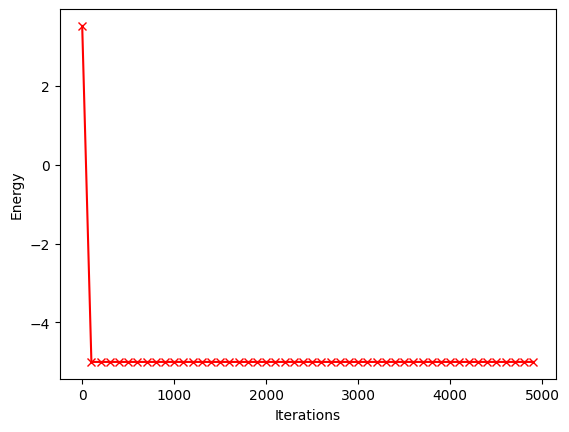

In [14]:
plt.plot(range(0, num_iter, mid_steps), energies, "rx-")
plt.xlabel("Iterations")
plt.ylabel("Energy");

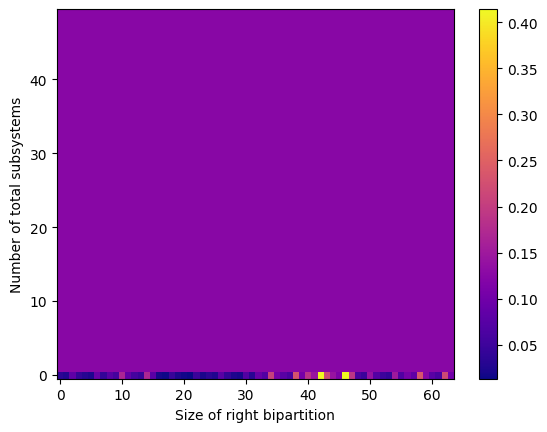

In [15]:
plt.imshow(
    np.abs(wave_functions),
    origin="lower",
    cmap="plasma",
    aspect="auto"
)
plt.xlabel("Size of right bipartition")
plt.ylabel("Number of total subsystems")
plt.colorbar();